In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carregar o dataset
base_hotel = pd.read_csv(r'/content/Hotel Reservations.csv')

# Classificação de preço
def classify_price(price):
    if price <= 85:
        return 1
    elif 85 < price < 115:
        return 2
    else:
        return 3

# Criar a coluna de label 'label_avg_price_per_room'
base_hotel['label_avg_price_per_room'] = base_hotel['avg_price_per_room'].apply(classify_price)
base_hotel = base_hotel.drop(columns=['avg_price_per_room'])

# Reorganizar as colunas
colunas = []
colunas.append('label_avg_price_per_room')
for i in range(len(base_hotel.columns[:-1])):
    print(base_hotel.columns[i])
    colunas.append(base_hotel.columns[i])

base_hotel = base_hotel[colunas]

# Lista de colunas a serem removidas
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type',
                         'repeated_guest', 'no_of_previous_cancellations',
                         'no_of_previous_bookings_not_canceled', 'booking_status']

# Filtrar e remover as colunas existentes
colunas_existentes = [col for col in colunas_para_remover if col in base_hotel.columns]
base_hotel = base_hotel.drop(columns=colunas_existentes, axis=1).copy()

# Aplicando One-Hot Encoding
base_hotel = pd.get_dummies(base_hotel, prefix=['type_of_meal_plan', 'required_car_parking_space',
                                                'room_type_reserved', 'arrival_year', 'arrival_month',
                                                'no_of_special_requests'],
                             columns=['type_of_meal_plan', 'required_car_parking_space',
                                      'room_type_reserved', 'arrival_year', 'arrival_month',
                                      'no_of_special_requests'])

# Definindo X e y
X = base_hotel.iloc[:, 1:].values
X = np.array(X).astype('float32')
y = base_hotel.iloc[:, 0].values

# Dividir o conjunto de dados em treinamento e teste
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X, Y_encoded, test_size=0.3, random_state=0)

# Configuração dos hiperparâmetros para RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200],  # Número de árvores
    'max_depth': [10, 15],  # Profundidade máxima da árvore
    'learning_rate': [0.05, 0.1],  # Taxa de aprendizado
    'subsample': [0.9, 1.0],  # Proporção de amostras usadas para ajustar cada árvore
    'colsample_bytree': [0.8, 0.9],  # Proporção de colunas usadas para ajustar cada árvore
    'gamma': [0, 0.2],  # Regularização por complexidade de modelo
    'min_child_weight': [1, 3],  # Peso mínimo da folha
    'reg_alpha': [0, 0.1],  # Regularização L1
    'reg_lambda': [1, 1.5]  # Regularização L2
}

# Inicializar o classificador XGBoost
model_xgb = xgb.XGBClassifier(
    eval_metric='mlogloss',  # Métrica para problemas de classificação multiclasse
    num_class=len(np.unique(Y_encoded))  # Número de classes
)

# Inicializar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_distributions,
    n_iter=100,  # Número de combinações aleatórias a serem testadas
    scoring='accuracy',
    cv=3,  # Número de folds para cross-validation
    n_jobs=-1,  # Utiliza todos os núcleos do processador
    verbose=2,  # Mostra detalhes sobre o progresso
    random_state=0  # Para reprodutibilidade
)

# Treinar o RandomizedSearchCV
random_search.fit(X_treinamento, Y_treinamento)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros encontrados:\n", random_search.best_params_)

# Melhor modelo encontrado
best_model = random_search.best_estimator_

# Fazer previsões
Y_pred_xgb_encoded = best_model.predict(X_teste)

# Decodificar as previsões de volta para os rótulos originais
Y_pred_xgb = label_encoder.inverse_transform(Y_pred_xgb_encoded)

# Decodificar os rótulos de teste para os rótulos originais
Y_teste_decoded = label_encoder.inverse_transform(Y_teste)

# Avaliar o modelo
print("XGBoost Accuracy Score:", accuracy_score(Y_teste_decoded, Y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(Y_teste_decoded, Y_pred_xgb))

# Verifique as classes únicas no conjunto de teste e previsões
print("Classes únicas no conjunto de teste:", np.unique(Y_teste_decoded))
print("Classes únicas nas previsões:", np.unique(Y_pred_xgb))

Booking_ID
no_of_adults
no_of_children
no_of_weekend_nights
no_of_week_nights
type_of_meal_plan
required_car_parking_space
room_type_reserved
lead_time
arrival_year
arrival_month
arrival_date
market_segment_type
repeated_guest
no_of_previous_cancellations
no_of_previous_bookings_not_canceled
no_of_special_requests
booking_status


NameError: name 'Y_encoded' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Carregar o dataset
base_hotel = pd.read_csv(r'/content/Hotel Reservations.csv')

# Classificação de preço
def classify_price(price):
    if price <= 85:
        return 1  # Classe 1
    elif 85 < price < 115:
        return 2  # Classe 2
    else:
        return 3  # Classe 3

# Criar a coluna de label 'label_avg_price_per_room'
base_hotel['label_avg_price_per_room'] = base_hotel['avg_price_per_room'].apply(classify_price)
base_hotel = base_hotel.drop(columns=['avg_price_per_room'])

# Reorganizar as colunas
colunas = ['label_avg_price_per_room'] + [col for col in base_hotel.columns if col != 'label_avg_price_per_room']
base_hotel = base_hotel[colunas]

# Lista de colunas a serem removidas
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type',
                         'repeated_guest', 'no_of_previous_cancellations',
                         'no_of_previous_bookings_not_canceled', 'booking_status']

# Filtrar e remover as colunas existentes
colunas_existentes = [col for col in colunas_para_remover if col in base_hotel.columns]
base_hotel = base_hotel.drop(columns=colunas_existentes, axis=1).copy()

# Aplicando One-Hot Encoding
base_hotel = pd.get_dummies(base_hotel, prefix=['type_of_meal_plan', 'required_car_parking_space',
                                                'room_type_reserved', 'arrival_year', 'arrival_month',
                                                'no_of_special_requests'],
                             columns=['type_of_meal_plan', 'required_car_parking_space',
                                      'room_type_reserved', 'arrival_year', 'arrival_month',
                                      'no_of_special_requests'])

# Definindo X e y
X = base_hotel.iloc[:, 1:].values
X = np.array(X).astype('float32')
y = base_hotel.iloc[:, 0].values

# Converter classes para começar em 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir o conjunto de dados em treinamento e teste
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

# Configuração dos hiperparâmetros para RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100],  # Reduzido para 2 valores
    'max_depth': [10, 15],  # Mantido
    'learning_rate': [0.1],  # Reduzido para 1 valor
    'subsample': [0.9],  # Reduzido para 1 valor
    'colsample_bytree': [0.8],  # Reduzido para 1 valor
    'gamma': [0, 0.2],  # Mantido
    'min_child_weight': [1],  # Reduzido para 1 valor
    'reg_alpha': [0],  # Reduzido para 1 valor
    'reg_lambda': [1]  # Reduzido para 1 valor
}

# Inicializar o classificador XGBoost
model_xgb = xgb.XGBClassifier(
    eval_metric='mlogloss',  # Métrica para problemas de classificação multiclasse
    num_class=len(np.unique(y_encoded))  # Número de classes
)

# Inicializar o RandomizedSearchCV com menos iterações e menos folds
random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_distributions,
    n_iter=20,  # Reduzido para 20 combinações
    scoring='accuracy',
    cv=2,  # Reduzido para 2 folds
    n_jobs=-1,  # Utiliza todos os núcleos do processador
    verbose=2,  # Mostra detalhes sobre o progresso
    random_state=0  # Para reprodutibilidade
)

# Treinar o RandomizedSearchCV
random_search.fit(X_treinamento, Y_treinamento)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros encontrados:\n", random_search.best_params_)

# Melhor modelo encontrado
best_model = random_search.best_estimator_

# Fazer previsões
Y_pred_xgb_encoded = best_model.predict(X_teste)

# Decodificar as previsões de volta para os rótulos originais
Y_pred_xgb = label_encoder.inverse_transform(Y_pred_xgb_encoded)

# Decodificar os rótulos de teste para os rótulos originais
Y_teste_decoded = label_encoder.inverse_transform(Y_teste)

# Avaliar o modelo
print("XGBoost Accuracy Score:", accuracy_score(Y_teste_decoded, Y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(Y_teste_decoded, Y_pred_xgb))

# Verifique as classes únicas no conjunto de teste e previsões
print("Classes únicas no conjunto de teste:", np.unique(Y_teste_decoded))
print("Classes únicas nas previsões:", np.unique(Y_pred_xgb))

Fitting 2 folds for each of 8 candidates, totalling 16 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores hiperparâmetros encontrados:
 {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
XGBoost Accuracy Score: 0.7927961040154369
XGBoost Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.77      0.79      3258
           2       0.76      0.76      0.76      4006
           3       0.82      0.84      0.83      3619

    accuracy                           0.79     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.79      0.79      0.79     10883

Classes únicas no conjunto de teste: [1 2 3]
Classes únicas nas previsões: [1 2 3]


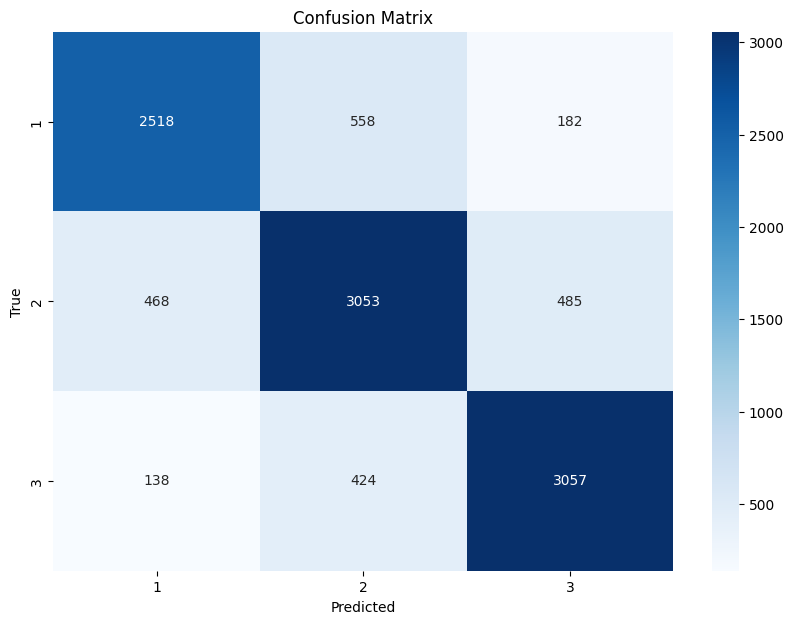

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular a matriz de confusão
cm = confusion_matrix(Y_teste_decoded, Y_pred_xgb)

# Criar um heatmap da matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(Y_teste_decoded),
            yticklabels=np.unique(Y_teste_decoded))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Melhores hiperparâmetros encontrados:
 {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
XGBoost Accuracy Score: 0.7927961040154369
XGBoost Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.77      0.79      3258
           2       0.76      0.76      0.76      4006
           3       0.82      0.84      0.83      3619

    accuracy                           0.79     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.79      0.79      0.79     10883



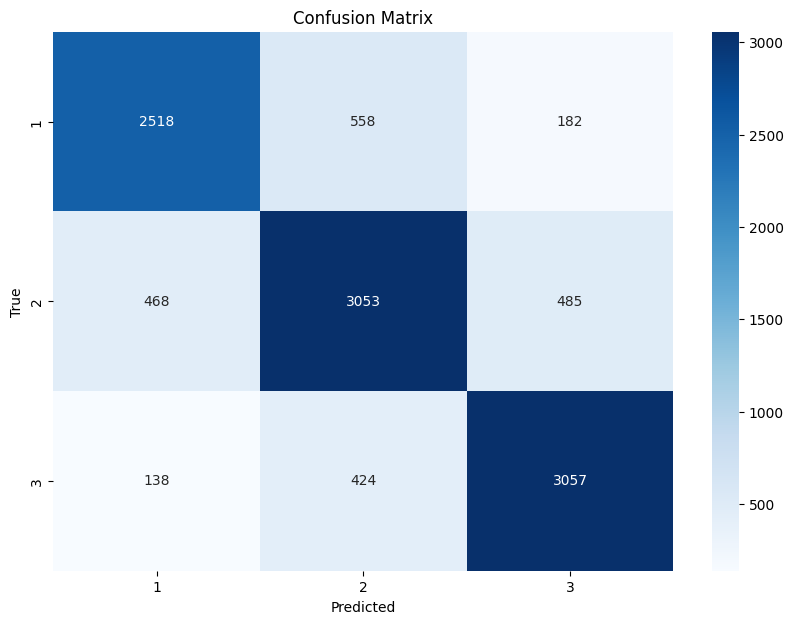

Classes únicas no conjunto de teste: [1 2 3]
Classes únicas nas previsões: [1 2 3]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Carregar o dataset
base_hotel = pd.read_csv(r'/content/Hotel Reservations.csv')

# Classificação de preço
def classify_price(price):
    if price <= 85:
        return 1  # Classe 1
    elif 85 < price < 115:
        return 2  # Classe 2
    else:
        return 3  # Classe 3

# Criar a coluna de label 'label_avg_price_per_room'
base_hotel['label_avg_price_per_room'] = base_hotel['avg_price_per_room'].apply(classify_price)
base_hotel = base_hotel.drop(columns=['avg_price_per_room'])

# Reorganizar as colunas
colunas = ['label_avg_price_per_room'] + [col for col in base_hotel.columns if col != 'label_avg_price_per_room']
base_hotel = base_hotel[colunas]

# Lista de colunas a serem removidas
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type',
                         'repeated_guest', 'no_of_previous_cancellations',
                         'no_of_previous_bookings_not_canceled', 'booking_status']

# Filtrar e remover as colunas existentes
colunas_existentes = [col for col in colunas_para_remover if col in base_hotel.columns]
base_hotel = base_hotel.drop(columns=colunas_existentes, axis=1).copy()

# Aplicando One-Hot Encoding
base_hotel = pd.get_dummies(base_hotel, prefix=['type_of_meal_plan', 'required_car_parking_space',
                                                'room_type_reserved', 'arrival_year', 'arrival_month',
                                                'no_of_special_requests'],
                             columns=['type_of_meal_plan', 'required_car_parking_space',
                                      'room_type_reserved', 'arrival_year', 'arrival_month',
                                      'no_of_special_requests'])

# Definindo X e y
X = base_hotel.iloc[:, 1:].values
X = np.array(X).astype('float32')
y = base_hotel.iloc[:, 0].values

# Converter classes para começar em 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir o conjunto de dados em treinamento e teste
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

# Configuração dos hiperparâmetros para RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100],  # Reduzido para 2 valores
    'max_depth': [10, 15],  # Mantido
    'learning_rate': [0.1],  # Reduzido para 1 valor
    'subsample': [0.9],  # Reduzido para 1 valor
    'colsample_bytree': [0.8],  # Reduzido para 1 valor
    'gamma': [0, 0.2],  # Mantido
    'min_child_weight': [1],  # Reduzido para 1 valor
    'reg_alpha': [0],  # Reduzido para 1 valor
    'reg_lambda': [1]  # Reduzido para 1 valor
}

# Inicializar o classificador XGBoost
model_xgb = xgb.XGBClassifier(
    eval_metric='mlogloss',  # Métrica para problemas de classificação multiclasse
    num_class=len(np.unique(y_encoded))  # Número de classes
)

# Inicializar o RandomizedSearchCV com menos iterações e menos folds
random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_distributions,
    n_iter=8,  # Ajustado para o número de combinações possíveis
    scoring='accuracy',
    cv=3,  # Aumentado para 3 folds para melhor validação
    n_jobs=-1,  # Utiliza todos os núcleos do processador
    verbose=2,  # Mostra detalhes sobre o progresso
    random_state=0  # Para reprodutibilidade
)

# Treinar o RandomizedSearchCV
random_search.fit(X_treinamento, Y_treinamento)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros encontrados:\n", random_search.best_params_)

# Melhor modelo encontrado
best_model = random_search.best_estimator_

# Fazer previsões
Y_pred_xgb_encoded = best_model.predict(X_teste)

# Decodificar as previsões de volta para os rótulos originais
Y_pred_xgb = label_encoder.inverse_transform(Y_pred_xgb_encoded)

# Decodificar os rótulos de teste para os rótulos originais
Y_teste_decoded = label_encoder.inverse_transform(Y_teste)

# Avaliar o modelo
print("XGBoost Accuracy Score:", accuracy_score(Y_teste_decoded, Y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(Y_teste_decoded, Y_pred_xgb))

# Visualização da matriz de confusão
cm = confusion_matrix(Y_teste_decoded, Y_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(Y_teste_decoded),
            yticklabels=np.unique(Y_teste_decoded))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Verificar classes únicas
print("Classes únicas no conjunto de teste:", np.unique(Y_teste_decoded))
print("Classes únicas nas previsões:", np.unique(Y_pred_xgb))